<a href="https://colab.research.google.com/github/gombaniro/topic-discovery/blob/main/Topic_descovery_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Discovery
##### Problem statement background
** **
Develop a topic modeling solution to automatically identify and categorize the underlying topics in a large collection of scientific papers.
The goal is to facilitate better organization, retrieval, and analysis of scientific literature, enabling researchers to quickly
find relevant papers and identify emerging trends in their fields.:

1. **Identify Topics**: Automatically identify and label distinct topics across the collection of papers.
2. **Categorize Papers**: Assign each paper to one or more topics based on its content.
3. **Trend Analysis**: Analyze the distribution of topics over time to identify emerging trends and shifts in research focus.
4. **Search and Retrieval**: Enhance the search and retrieval process by allowing users to find papers based on topics

#### Requirements
** **

1. **Dataset Preprocessing**:
   - Preprocess the text of scientific papers to clean and standardize the content (e.g., removing stop words, stemming/lemmatization, handling special characters).
   - Extract text features from papers title, abstract and main content.

2. **Model Development**:
   - Choose an appropriate topic modeling algorithm (e.g., Latent Dirichlet Allocation (LDA),
   -  Non-Negative Matrix Factorization (NMF),
   -  Advanced neural network-based approaches like BERTopic).
   - Optimize the number of topics and model parameters to balance interpretability and accuracy.

3. **Evaluation Metrics**:
   - Use metrics such as coherence score, perplexity, and human evaluation to assess the quality and coherence of the identified topics.
   - Validate the model effectiveness in categorizing papers by comparing it with existing classification systems (e.g., journal categories).

4. **Implementation**:
   - Develop python scripts and explore topics and retrieve relevant papers.
   - Implement visualization tools (e.g., topic distribution over time, word clouds) to help users understand and interpret the topics.

5. **Scalability and Performance**:
   - Ensure the solution can handle large datasets and provide results within a reasonable time frame.
   - Consider cloud-based or distributed computing solutions to manage computational demands.

### Approach Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document
-  topic density  with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic
-  Word density  with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.



** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
For this tutorial, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_158/img/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)">

Let’s start by looking at the content of the file

** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **
For this project, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

Let’s start by looking at the content of the file

In [ ]:
import zipfile
import pandas as pd
import os

# Open the zip file
with zipfile.ZipFile("/home/topicDiscoveryFinal/data/NIPSPapers.zip", "r") as zip_ref:
    # Extract the file to a temporary directory
    zip_ref.extractall("/home/topicDiscoveryFinal/temp")

# Read the CSV file into a pandas DataFrame
papers = pd.read_csv("/home/topicDiscoveryFinal/temp/NIPS Papers/papers.csv")

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 100 papers

In [ ]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
1561,2003,Linear Response for Approximate Inference,Abstract Missing,Linear Response for Approximate Inference\n\nM...
5060,2014,Coresets for k-Segmentation of Streaming Data,"Life-logging video streams, financial time ser...",Coresets for k-Segmentation of Streaming Data\...
1384,1989,The Perceptron Algorithm Is Fast for Non-Malic...,Abstract Missing,676\n\nBaum\n\nThe Perceptron Algorithm Is Fas...
5725,2016,Learning Kernels with Random Features,Randomized features provide a computationally ...,Learning Kernels with Random Features\n\nAman ...
5890,2016,Short-Dot: Computing Large Linear Transforms D...,Faced with saturation of Moore's law and incre...,?Short-Dot?: Computing Large Linear Transforms...


##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [ ]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

1561    linear response for approximate inference\n\nm...
5060    coresets for k-segmentation of streaming data\...
1384    676\n\nbaum\n\nthe perceptron algorithm is fas...
5725    learning kernels with random features\n\naman ...
5890    short-dot: computing large linear transforms\n...
Name: paper_text_processed, dtype: object

** **
#### Step 3: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

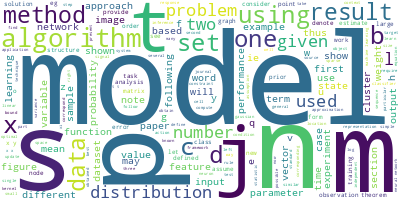

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

** **
#### Step 4: Prepare text for LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:3][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['linear', 'response', 'approximate', 'inference', 'max', 'welling', 'department', 'computer', 'science', 'university', 'toronto', 'toronto', 'canada', 'welling', 'csutorontoca', 'yee', 'whye', 'teh', 'computer', 'science', 'division', 'university', 'california', 'berkeley', 'berkeley', 'ca', 'usa', 'ywteh', 'eecsberkeleyedu', 'abstract']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 3), (12, 3), (13, 1), (14, 17), (15, 8), (16, 1), (17, 4), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 18), (28, 1), (29, 7)]
100


** **
#### Step 5: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

we keep all the parameters to default except for inputting the number of topics. For this project, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.006*"learning" + 0.006*"data" + 0.005*"algorithm" + '
  '0.004*"distribution" + 0.003*"two" + 0.003*"using" + 0.003*"figure" + '
  '0.003*"used" + 0.003*"one"'),
 (1,
  '0.005*"data" + 0.005*"set" + 0.005*"learning" + 0.004*"using" + '
  '0.004*"model" + 0.004*"distribution" + 0.004*"algorithm" + 0.003*"one" + '
  '0.003*"two" + 0.003*"figure"'),
 (2,
  '0.006*"model" + 0.006*"data" + 0.004*"using" + 0.004*"time" + 0.004*"set" + '
  '0.004*"used" + 0.004*"learning" + 0.003*"xi" + 0.003*"matrix" + '
  '0.003*"figure"'),
 (3,
  '0.008*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"one" + '
  '0.004*"figure" + 0.004*"set" + 0.004*"image" + 0.004*"distribution" + '
  '0.003*"using" + 0.003*"two"'),
 (4,
  '0.006*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"algorithm" + '
  '0.004*"using" + 0.003*"distribution" + 0.003*"based" + 0.003*"figure" + '
  '0.003*"one" + 0.003*"problem"'),
 (5,
  '0.007*"model" + 0.006*"data" + 0.005*"learning" + 0.004*"matrix" 

** **
#### Step 6: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [ ]:
!pip install pyLDAvis gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



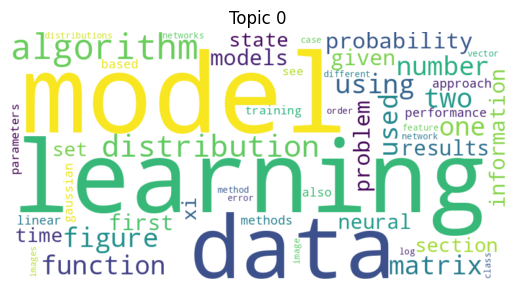

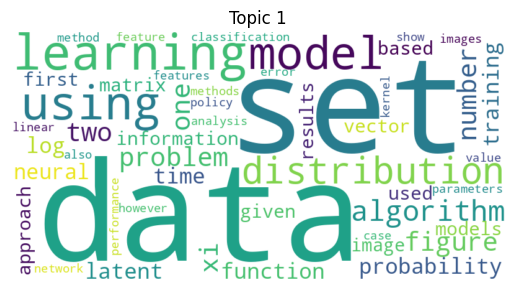

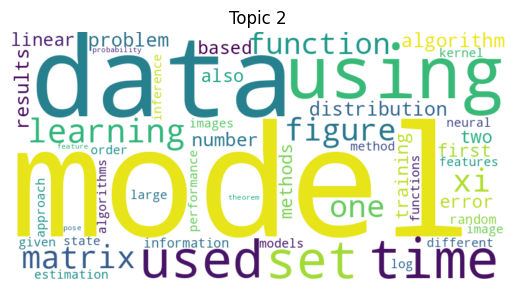

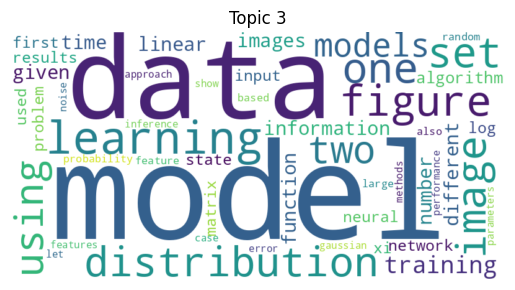

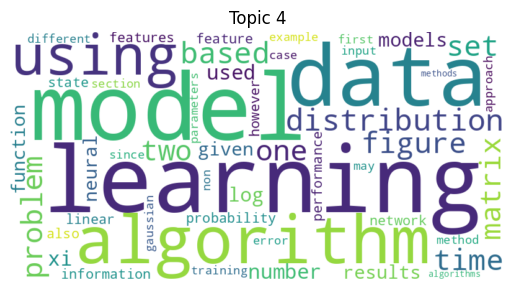

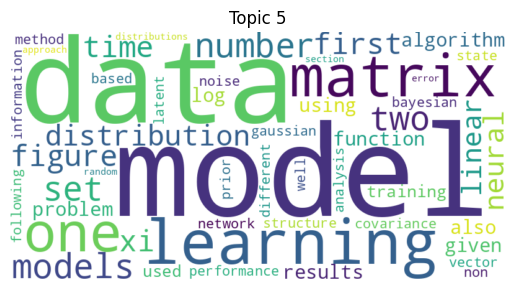

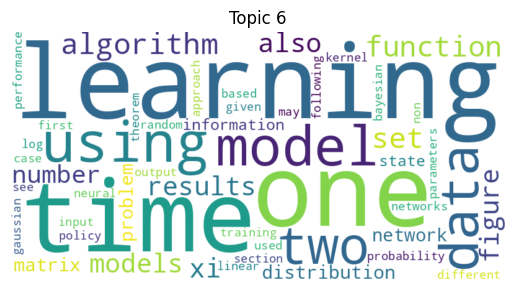

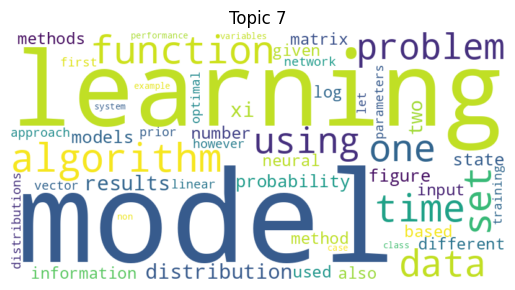

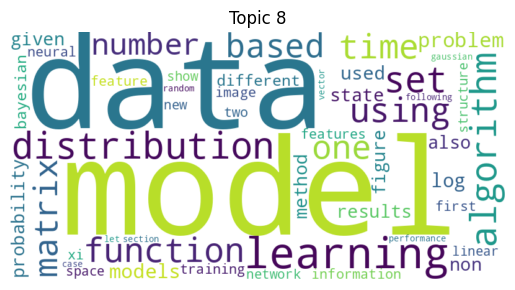

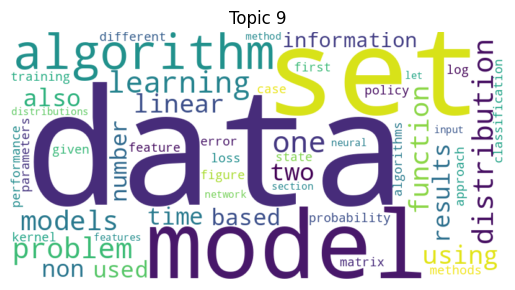

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each topic
def plot_word_cloud(model, num_topics):
    for topic_id in range(num_topics):
        plt.figure()
        topic = dict(model.show_topic(topic_id, 50))  # Get the top 20 words for this topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_id}')
        plt.show()

# Plot the word clouds
plot_word_cloud(lda_model, num_topics)

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/home/topicDiscoveryFinal/results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/home/topicDiscoveryFinal/results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.011209 -0.002522       1        1  26.296763
3     -0.005891 -0.002559       2        1  13.576138
6     -0.001304  0.007855       3        1  11.628170
0     -0.001283 -0.003581       4        1  10.920078
5     -0.006743  0.001075       5        1  10.738490
2     -0.002570 -0.006266       6        1   8.893322
7      0.002719  0.002606       7        1   7.797081
4     -0.000223  0.001783       8        1   4.738596
1      0.002085  0.000990       9        1   3.319347
8      0.002001  0.000620      10        1   2.092016, topic_info=             Term         Freq        Total Category  logprob  loglift
1150        model  1470.000000  1470.000000  Default  30.0000  30.0000
136          data  1362.000000  1362.000000  Default  29.0000  29.0000
352      learning  1109.000000  1109.000000  Default  28.0000  28.0000
14      algorithm   917.000000   917.000000  Default  27.0000  27.0000
551           set   978.000000   978.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
17           also    12.039280   599.126089  Topic10  -6.0329  -0.0403
528       results    12.313428   627.115066  Topic10  -6.0104  -0.0634
234        figure    11.610284   694.122965  Topic10  -6.0692  -0.2237
2361     training    10.841500   556.520136  Topic10  -6.1377  -0.0713
310   information    10.862827   573.630801  Topic10  -6.1357  -0.0996

[893 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
7625       1  0.245878  abscissa
7625       3  0.245878  abscissa
7625       5  0.245878  abscissa
7625       7  0.245878  abscissa
2          1  0.383440  abstract
...      ...       ...       ...
12426      4  0.119568        zr
12426      5  0.239137        zr
12426      6  0.059784        zr
12426      7  0.059784        zr
12426      8  0.059784        zr

[3839 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 7, 1, 6, 3, 8, 5, 2, 9])

In [ ]:
# from gensim.models import Nmf

# Train the model on the corpus.

from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
nmf_model = gensim.models.Nmf(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(nmf_model.print_topics())
doc_nmf = nmf_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:578: DeprecationWarning:

Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:607: DeprecationWarning:

Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.

/usr/local/lib/python3.10/dist-packages/gensim/models/nmf.py:620: DeprecationWarning:

Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.



[(0,
  '0.016*"xi" + 0.011*"model" + 0.011*"data" + 0.009*"figure" + '
  '0.008*"context" + 0.007*"tensor" + 0.007*"random" + 0.007*"two" + '
  '0.006*"cluster" + 0.006*"order"'),
 (1,
  '0.010*"problem" + 0.010*"data" + 0.010*"model" + 0.008*"learning" + '
  '0.007*"distribution" + 0.007*"set" + 0.006*"robust" + 0.006*"prior" + '
  '0.006*"one" + 0.006*"number"'),
 (2,
  '0.013*"algorithm" + 0.010*"gradient" + 0.008*"learning" + 0.008*"loop" + '
  '0.007*"problem" + 0.006*"algorithms" + 0.005*"one" + 0.005*"kernel" + '
  '0.005*"using" + 0.005*"classification"'),
 (3,
  '0.012*"mixed" + 0.011*"model" + 0.008*"vine" + 0.007*"continuous" + '
  '0.007*"pr" + 0.006*"discrete" + 0.006*"noise" + 0.006*"copula" + '
  '0.005*"task" + 0.005*"fi"'),
 (4,
  '0.015*"matrix" + 0.013*"model" + 0.010*"models" + 0.009*"variables" + '
  '0.009*"log" + 0.008*"bayesian" + 0.008*"learning" + 0.008*"kernel" + '
  '0.007*"time" + 0.007*"graph"'),
 (5,
  '0.012*"image" + 0.012*"images" + 0.010*"model" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



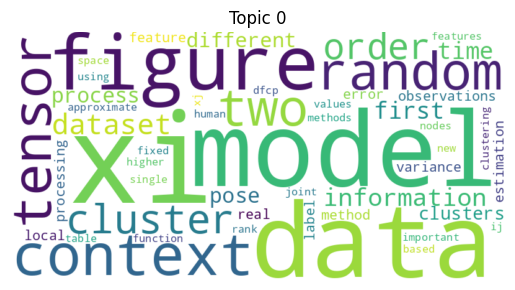

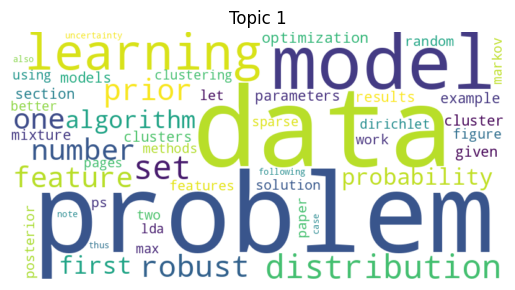

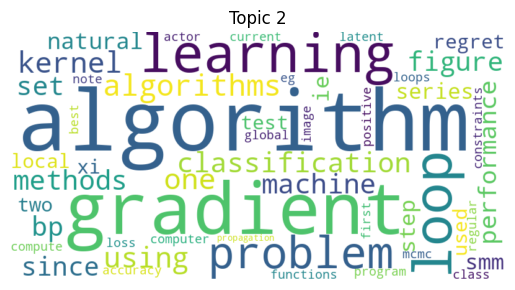

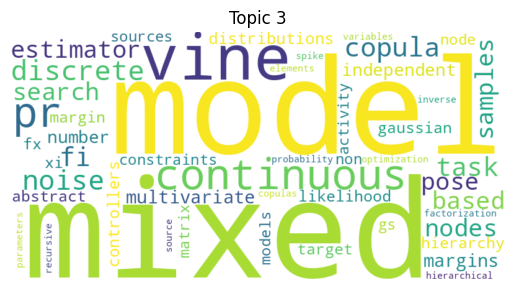

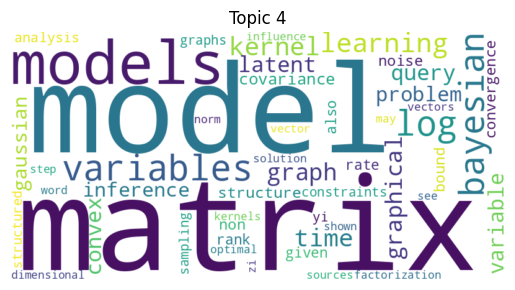

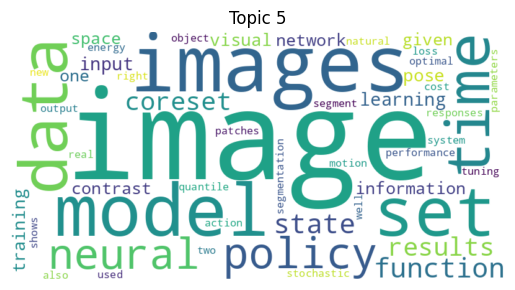

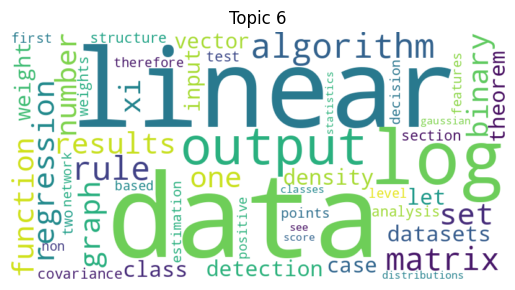

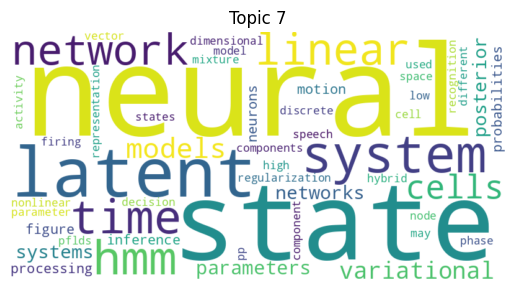

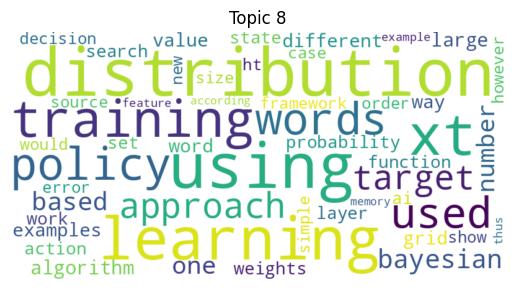

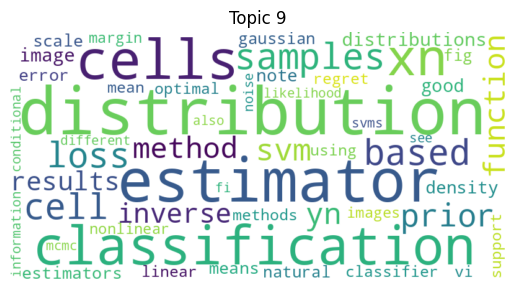

In [ ]:
# Plot the word clouds
plot_word_cloud(nmf_model, num_topics)


In [ ]:
!pip install bertopic
# Choose an embedding backend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#  preprocessing for bertopic function
def bert_preprocess(tokens):
    return ' '.join(tokens)

# Apply preprocessing to all documents
docs = [bert_preprocess(doc) for doc in data_words]

len(docs)
len(data_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



100

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(nr_topics=20)
topics, probs = topic_model.fit_transform(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.



In [ ]:
topic_model.get_topic_info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name,Representation,Representative_Docs
0,-1,6,-1_tensor_regularization_convex_rules,"[tensor, regularization, convex, rules, stage,...",[fast rates exp concave empirical risk minimiz...
1,0,69,0_learning_model_data_algorithm,"[learning, model, data, algorithm, set, using,...",[convex neural networks yoshua bengio nicolas ...
2,1,25,1_model_image_images_cells,"[model, image, images, cells, pose, data, time...",[linear dynamical neural population models non...


In [ ]:
topic_model.get_topic(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('learning', 0.0286018013645226),
 ('data', 0.026131558798971874),
 ('model', 0.025717987017400606),
 ('algorithm', 0.0223322212237444),
 ('set', 0.021868298923474448),
 ('one', 0.019452815684049923),
 ('using', 0.019406521326732172),
 ('distribution', 0.019214233529492142),
 ('problem', 0.01861991944334386),
 ('matrix', 0.018033576456756566)]

In [ ]:
topic_model.get_document_info(docs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,linear response approximate inference max well...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,1.000000,False
1,coresets segmentation streaming data guy rosma...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,0.910835,False
2,baum perceptron algorithm fast tor non malicio...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,1.000000,False
3,learning kernels random features aman sinha jo...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,1.000000,True
4,short dot computing large linear transforms di...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,0.992839,False
...,...,...,...,...,...,...,...,...
95,softassign versus softmax benchmarks combinato...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,0.988261,False
96,mocap guided data augmentation pose estimation...,1,1_model_image_images_data,"[model, image, images, data, cells, pose, time...",[exploiting weakly labeled web images improve ...,model - image - images - data - cells - pose -...,0.868258,False
97,learning context category daniel navarro schoo...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,0.939941,False
98,bayesian nonlinear support vector machines dis...,0,0_learning_data_model_algorithm,"[learning, data, model, algorithm, set, one, u...",[convex neural networks yoshua bengio nicolas ...,learning - data - model - algorithm - set - on...,1.000000,False


In [ ]:
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Fine-tune your topic representations

In [ ]:
from bertopic.representation import KeyBERTInspired

# Fine-tune your topic representations
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



** **
#### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this article addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### References:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
